# Deep Learning with Tensorflow/Keras

## Tensorflow  Basics

### Tensorflow
* 구글이 만든 Numerical Computation을 위한 오픈소스 소프트웨어
* C++, Python, Java, Go biding
* Data Flow Graphs 기반
    * Graph
    * Operation(Node)
    * Tensor(Edge)
* 머신러닝/딥러닝에 필요한 이미 구현된 함수
* High-Level API
    * 추상화 단계가 높은 API : Keras, Estimators, TF-Slim 등
* Low-Level API
    * Data Flow Graph 기반 API
* GPU(CUDA) 지원
    * 코드 변경없이 CPU 환경과 호환
* 데이터, 모델 병렬화
* TensorBoard 시각화 도구

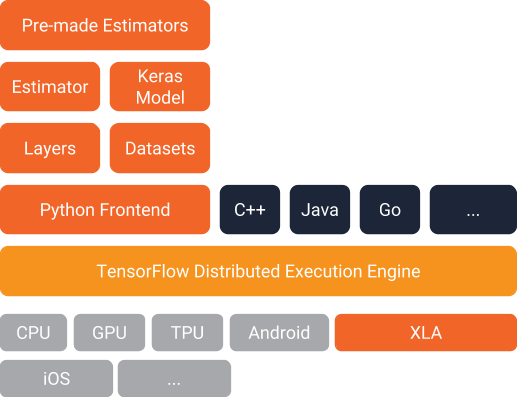

* Tensorflow, 단어의 의미
    * Tensor : 다차원 배열
    * Dataflow : Tensor 형태의 데이터가 딥러닝 모델을 구성하는 연산들의 그래프를 따라 흐르면서 연산
    * Tensorflow = Tensor + Flow

### Hello World!

In [13]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print("version:%s"%tf.__version__)
print("GPU available:", tf.test.is_gpu_available())

hello = tf.constant("Hello World!!")
sess = tf.Session()
res = sess.run(hello)
print(res)
sess.close()

version:2.0.0
GPU available: True
b'Hello World!!'


### Computational Graph
* Graph : 노드(Node)들이 변(Edge)를 통해 서로 연결되어 있는 객체(Entity)의 집합
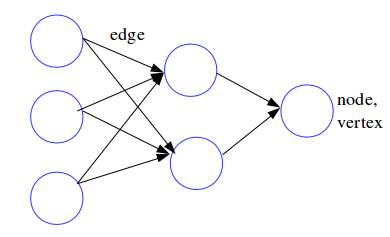

* Node
    * 하나의 연산(Operation)
    * 입력 값을 받아 다른 노드로 전달할 결과 값을 출력
* 의존관계
    * 그래프로 노드간의 의존 관계(Dependency) 파악 가능
    * 의존관계를 이용해 연산량을 최소화 가능
        * 그림 'A'의 Node 'e'는 Node 'c'에 직접 의존, Node 'a'에 간접의존
        * 그림에서 Node 'e'를 계산하기 위해서는 Node 'c', 'b', 'a'만 계산
    
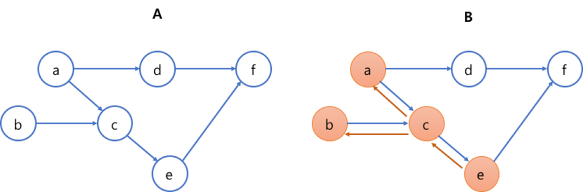    

### Tensorflow Low-Level API
* tf.Graph
* tf.Session
* tf.constant
* tf.Variable
* tf.placeholder

### 그래프
* 값(Value, Tensor)와 연산(Operation)으로 구성된 Computational Graph
* 상수, 변수 등의 텐서를 생성하면 이것은 하나의 계산 그래프에 추가
* 각 텐서의 `t.graph` 속성에 지정된다
* Default graph
    * Tensorflow import와 동시에 자동 생성
    * 모든 Node가 자동 연결
    * 객체 얻기 : ```tf.get_default_graph()```
    * 모든 연결을 초기화 : ```tf.reset_default_graph()```
* 생성과 연결
    * ```g = tf.Graph()``` : 새로운 그래프 생성
    * ```g.as_default()```  : 생성한 그래프를 디폴트 그래프로 지정, with 구문과 함께 사용
* 연결된 모든 Operation 목록
    * ```g.get_operations()```
* 이름으로 텐서 객체 가져오기
    * ```g.get_tensor_by_name('name:0')```  
* 텐서를 생성하는것과 같은 코드를 반복해서 실행하면 그래프에 중복된 텐서가 텐서 노드가 포함되기 때문에 오류가 발생
    * `tf.reset_default_graph()`를 실행
    *  또는
    * 파이썬 프로세스 또는 커널 재 실행
    

In [14]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

dflt_grph = tf.get_default_graph()
print(dflt_grph)

new_grph = tf.Graph()
print(new_grph)

ctx = new_grph.as_default()
print(ctx)
print(tf.get_default_graph())
print(new_grph is tf.get_default_graph())

with new_grph.as_default():
    print(tf.get_default_graph())
    print(new_grph is tf.get_default_graph())
print(new_grph is tf.get_default_graph())

False
True
False


## 상수
* [`tf.constant(value, dtype, shape, name)`](https://www.tensorflow.org/api_docs/python/tf/constant) : 상수 노드 생성 후 디폴트 그래프에 추가
    * value : Node가 가질 값
    * dtype : 데이타 타입
    * shape : Tensor 모양
    * name : 이름, 생략하면 "Const_n:m"으로 자동 지정
* 상수 값을 지정하는 텐서플로의 가장 기본적인 Operation
* [`tf.Tensor`](https://www.tensorflow.org/api_docs/python/tf/Tensor)
    * shape : shape
    * dtype : dtype
    * name : 이름
    * op : [`tf.Operation`](https://www.tensorflow.org/api_docs/python/tf/Operation)
    * graph : [`tf.Graph`](https://www.tensorflow.org/api_docs/python/tf/Graph)
    * eval(feed_dict, session) : 노드를 평가(실행)
* 초기화 없이 사용이 가능하다. 
* 값 변경 불가능
* 예) ```tf.constant(5)```
    1. 값 5를 생성하는 ```tf.Operation```(node)생성
    1. 생성한 node를 디폴트 그래프에 추가
    1. ```tf.Tensor```(edge)를 반환
* dtype

|데이터 타입 이름|	파이썬 데이터 타입|설명|
|---|---|---|
|DT_FLOAT|	tf.float32|	32비트 부동소수점 숫자|
|DT_DOUBLE|	tf.float64|	64비트 부동소수점 숫자|
|DT_INT8|	tf.int8	|8비트 정수|
|DT_INT16|	tf.int16|	16비트 정수|
|DT_INT32|	tf.int32|	32비트 정수|
|DT_INT64|	tf.int64|	64비트 정수|
|DT_UINT8|	tf.uint8|	8비트 부호 없는 정수|
|DT_UINT16|	tf.uint16|	16비트 부호 없는 정수|
|DT_STRING|	tf.string|	가변 길이 바이트 배열이며 텐서의 각 요소는 바이트의 배열|
|DT_BOOL|	tf.bool|	참거짓값|
|DT_COMPLEX64|	tf.complex64|	2개의 32비트 부동소수점 숫자로 구성된 복소수로 각각 실수부와 허수부|
|DT_COMPLEX128|	tf.complex128|	2개의 64비트 부동소수점 숫자로 구성된 복소수로 각각 실수부와 허수부|
|DT_QINT8|	tf.qint8|	양자화 연산(quantized operation)에 사용되는 8비트 정수|
|DT_QINT32|	tf.qint32|	양자화 연산에 사용되는 32비트 정수|
|DT_QUINT8|	tf.quint8|	양자화 연산에 사용되는 8비트 부호 없는 정수|
 

In [15]:
a = tf.constant(5)
b = tf.constant(3, name="my_const")
print(a, b)
#dir(a)

Tensor("Const_2:0", shape=(), dtype=int32) Tensor("my_const:0", shape=(), dtype=int32)


In [16]:
print(a.graph,  a.graph is tf.get_default_graph())
tf.get_default_graph().get_operations()

<tensorflow.python.framework.ops.Graph object at 0x000001F030193160> True


[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'my_const' type=Const>]

In [17]:
a.op

<tf.Operation 'Const_2' type=Const>

### 그래프 만들기
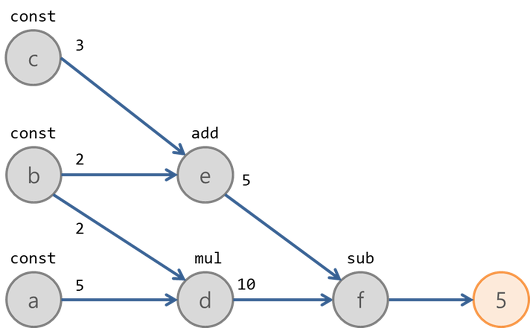

In [19]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()
tf.get_default_graph().get_operations()

a = tf.constant(5, name="a")
b = tf.constant(2, name="b")
c = tf.constant(3, name="c")
print(a, b, c)

d = tf.multiply(a, b, name="d")
e = tf.add(c, b, name="e")
f = tf.subtract(d, e, name="f")
print(d.op.type, e.op.type, f.op.type)

writer = tf.summary.FileWriter('./logs', tf.get_default_graph())
writer.close()

Tensor("a:0", shape=(), dtype=int32) Tensor("b:0", shape=(), dtype=int32) Tensor("c:0", shape=(), dtype=int32)
Mul Add Sub


### Tensorboard
* Graph를 시각적으로 표현
    * 그래프 저장 : ```tf.summary.FileWriter('./logs', tf.get_default_graph())```
* 터미널에서 명령어 입력
    * ```tensorboard --logdir=./logs```
* 브라우져 열기
    * http://localhost:6006
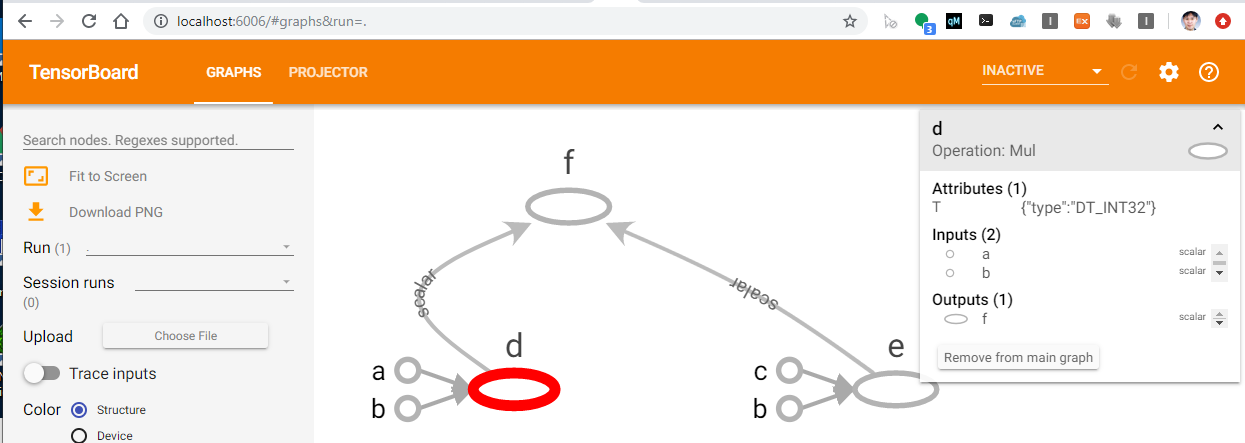

#### 축약 연산자
* ```tf.<operator>```를 축약 연산자로 사용가능

|TensorFlow 연산	|축약 연산자	|설명|
|---|---|---|
|tf.add()	|a + b|	a와 b를 더함|
tf.multiply()|	a * b|	a와 b를 곱함
tf.subtract()|	a - b|	a에서 b를 뺌
tf.divide()|	a / b|	a를 b로 나눔
tf.pow()|	a ** b|	$a^b$ 를 계산
tf.mod()|	a % b|	a를 b로 나눈 나머지를 구함
tf.logical_and()|	a & b|	a와 b의 논리곱을 구함. dtype은 반드시 tf.bool이어야 함
tf.greater()|	a > b|	$a > b$ 의 True/False 값을 반환
tf.greater_equal()|	a >= b|	$a \geq$ 의 True/False 값을 반환
tf.less_equal()|	a <= b|	$a \leq b$ 의 True/False 값을 반환
tf.less()|	a < b|	$a< b$ 의 True/False 값을 반환
tf.negative()|	-a|	a의 반대 부호 값을 반환
tf.logical_not()|	~a|	a의 반대의 참거짓을 반환. tf.bool 텐서만 적용 가능
tf.abs()|	abs(a)|	a의 각 원소의 절대값을 반환
tf.logical_or()|	a I b|	a와 b의 논리합을 구함. dtype은 반드시 tf.bool이어야 함

* ```tf.identity(node, "name")``` : 이름 지정
* ```graph.get_tensor_by_name("name:0")``` : 이름으로 텐서 노드 가져오기

In [20]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()
tf.get_default_graph().get_operations()

a = tf.constant(5, name="a")
b = tf.constant(2, name="b")
c = tf.constant(3, name="c")
print(a, b, c)

d = a * b
e = c + b
f = d - e
print(d.op.type, e.op.type, f.op.type)
tf.identity(d, "d_mul")
tf.identity(e, "e_add")
tf.identity(f, "f_sub")

writer = tf.summary.FileWriter('./logs', tf.get_default_graph())
writer.close()

Tensor("a:0", shape=(), dtype=int32) Tensor("b:0", shape=(), dtype=int32) Tensor("c:0", shape=(), dtype=int32)
Mul AddV2 Sub


Exception ignored in: <bound method BaseSession.__del__ of <tensorflow.python.client.session.Session object at 0x000001F030813160>>
Traceback (most recent call last):
  File "c:\python36\lib\site-packages\tensorflow_core\python\client\session.py", line 761, in __del__
    if self._session is not None:
AttributeError: 'Session' object has no attribute '_session'


### Session
* 노드들로 구성된 그래프를 실행하려면 Session이 필요
* [`tf.Session()`](https://www.tensorflow.org/api_docs/python/tf/Session)
    * `run()` : 그래프를 CPU 또는 GPU에 로드하고 실행한다.
    * `close()` : 세션 자원 반납
* `tf.get_default_session()` : 가장 가까운 컨텍스트의 기본 세션 반환
    * 전역영역에서는 기본적으로 `None` 반환
    * with 구문으로 블록내 default session 지정
        * `with tf.Session() as sess` : 생성과 동시에 default session으로 지정
        * `with sess.as_default()`: 생성 후 특정 블록에서 default session으로 지정
* `tf.InteractiveSession()`
    * 생성과 동시에 전역으로 사용할 default session으로 등록
    * with 구문이 불 필요
* 모든 tensor들은 `t.eval(session=sess)` 메서드를 가지고 있는데, 이것은 `sess.run(t)` 한것과 같다.
    * `sess=None`인경우 `tf.get_default_session()`사용

In [21]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print('1. default sess:', tf.get_default_session())

sess = tf.Session()
print(sess, tf.get_default_session())

1. default sess: None
<tensorflow.python.client.session.Session object at 0x000001F03080AC18> None


In [22]:
sess.as_default()
print('2. default sess:', tf.get_default_session())
with sess.as_default():
    print('3. default sess:', tf.get_default_session())
    print(sess is tf.get_default_session())
print('4. default sess:', tf.get_default_session())
sess.close()

2. default sess: None
3. default sess: <tensorflow.python.client.session.Session object at 0x000001F03080AC18>
True
4. default sess: None


In [23]:
with tf.Session() as sess2:
    print('5. default sess:', tf.get_default_session())
    print(sess2 is tf.get_default_session())
print('6. default sess:', tf.get_default_session())

5. default sess: <tensorflow.python.client.session.Session object at 0x000001F03080A6D8>
True
6. default sess: None


In [24]:
sess3 = tf.InteractiveSession()
print('6. default sess:', tf.get_default_session())
print(sess3 is tf.get_default_session())
sess3.close()

6. default sess: <tensorflow.python.client.session.InteractiveSession object at 0x000001F03080A390>
True


### 세션 실행
* 연산 그래프의 주어진 노드를 시작해서 역방향으로 의존관계에 따라 노드의 연산을 수행
* 2가지 방법
    * `sess.run(tensor)`
    * `tensor.eval(session=sess)`
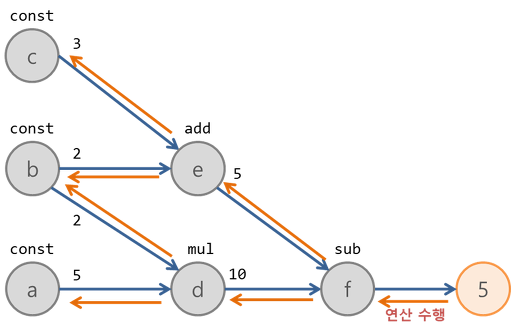

* `sess.run(tensor)`

In [26]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()
tf.get_default_graph().get_operations()

a = tf.constant(5, name="a")
b = tf.constant(2, name="b")
c = tf.constant(3, name="c")

d = tf.multiply(a, b, name="d")
e = tf.add(c, b, name="e")
f = tf.subtract(d, e, name="f")

sess = tf.Session()
out = sess.run(f)
sess.close()
print('out:', out)

out: 5


* `tensor.eval(session=sess)`

In [27]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


tf.reset_default_graph()
tf.get_default_graph().get_operations()

a = tf.constant(5, name="a")
b = tf.constant(2, name="b")
c = tf.constant(3, name="c")

d = tf.multiply(a, b, name="d")
e = tf.add(c, b, name="e")
f = tf.subtract(d, e, name="f")

sess = tf.Session()
out = f.eval(session=sess)
sess.close()
print('out:', out)

out: 5


* with 구문을 이용한 방법
    * `with tf.Session() as sess`:
    * `sess.close()` 불필요
    * `eval()`함수에 sess 지정 불필요

In [28]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()
tf.get_default_graph().get_operations()

a = tf.constant(5, name="a")
b = tf.constant(2, name="b")
c = tf.constant(3, name="c")

d = tf.multiply(a, b, name="d")
e = tf.add(c, b, name="e")
f = tf.subtract(d, e, name="f")

with tf.Session() as sess:
    out = f.eval()
print('out:', out)
with tf.Session() as sess:
    out = sess.run(f)
print('out:', out)

out: 5
out: 5


* fetches
    * `sess.run()`에 전달하는 인자
    * 하나의 노드 또는 노드들로 구성된 리스트(list)

In [29]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()
tf.get_default_graph().get_operations()

a = tf.constant(5, name="a")
b = tf.constant(2, name="b")
c = tf.constant(3, name="c")

d = tf.multiply(a, b, name="d")
e = tf.add(c, b, name="e")
f = tf.subtract(d, e, name="f")

with tf.Session() as sess:
    outs = sess.run([a,b,c,d,e,f])
print(outs)

[5, 2, 3, 10, 5, 5]


### 난수 생성
* 정규 분포(normal distribution)
    * `tf.random_normal(shape, mean, std)` : 정규 분포
    * `tf.truncated_normal(shape, mean, std)` : 절단 정규 분포
        * shape : 생성하려는 난수의 갯수와 형태
        * mean : 평균
        * std : 표준편차
* 균등 분포(uniform distribution)
    * `tf.random_uniform(shape, min, max)` : 균등분포

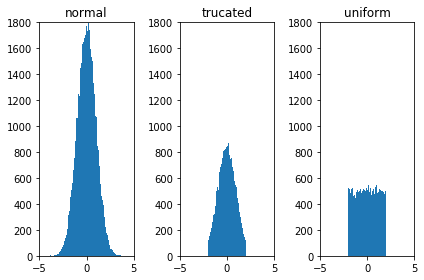

In [30]:
%matplotlib inline

#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt


tf.reset_default_graph()

shape = (1, 50000)
mean, std = 0, 1
x_normal = tf.random_normal(shape, mean, std)
x_truncated = tf.truncated_normal(shape, mean, std)

minval, maxval =  -2, 2
x_uniform = tf.random_uniform(shape, minval, maxval)

with tf.Session() as sess:
    norm, truc, unif = sess.run([x_normal, x_truncated, x_uniform])

for i, (title, x) in enumerate(zip(["normal", "trucated", "uniform"], [norm, truc, unif])):
    plt.subplot(1,3, i+1)
    plt.title(title)
    plt.hist(x[0], bins=100)
    plt.xlim([-5,5])
    plt.ylim((0,1800))
plt.tight_layout()
plt.show()


## 변수 
* `tf.Variable(inti_val, name='name', shape=shape, dtype=dtype)`
    * `init_val`로 초기화
* 값을 변경할 수 있는 변수
* 보통 학습 모델에 의해 Wegith(가중치)와 bias(편향)값을 보관할 목적으로 사용
    * 학습 과정에서 값 변경
* 사용하기 전에 초기화를 반드시 수행
    * sess.run(t.initializer) 
    * t.initializer.eval(session=sess)
* 여러 변수를 한꺼번에 초기화 할때
    * `sess.run(tf.global_variables_initializer())`
    * `tf.global_variable_initialzer.eval()` 
        * default session 있는 경우
* `tf.report_uninitialized_variables()` : 초기화 되지 않은 변수 목록  

In [31]:
# 개별 초기화
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
z = tf.Variable(-1, name='z')
do = tf.assign(z, x * y)
print(x, y, z)

with tf.Session() as sess:
    print(sess.run(tf.report_uninitialized_variables()))
    sess.run([x.initializer, y.initializer, z.initializer])
    print(sess.run([x,y,z]))
    outs = sess.run([z,do])
print(outs)

<tf.Variable 'x:0' shape=() dtype=int32_ref> <tf.Variable 'y:0' shape=() dtype=int32_ref> <tf.Variable 'z:0' shape=() dtype=int32_ref>
[b'x' b'y' b'z']
[3, 4, -1]
[12, 12]


In [32]:
# tf.global_variables_initializer()로 일괄 초기화
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
z = tf.Variable(-1, name='z')
do = tf.assign(z, x * y)
print(x, y, z)

with tf.Session() as sess:
    print(sess.run(tf.report_uninitialized_variables()))
    sess.run(tf.global_variables_initializer())
    print(sess.run([x, y, z]))
    outs = sess.run([z, do])
print(outs)

<tf.Variable 'x:0' shape=() dtype=int32_ref> <tf.Variable 'y:0' shape=() dtype=int32_ref> <tf.Variable 'z:0' shape=() dtype=int32_ref>
[b'x' b'y' b'z']
[3, 4, -1]
[12, 12]


### 변수 랜덤수 초기화
* 변수의 초기값을 지정하기 어려운 경우 랜덤 수 사용
* `tf.Variable(tf.random_normal([n, m])`

In [33]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

x = tf.Variable(tf.random_normal([]), name="x")
y = tf.Variable(tf.random_normal([2,3]), name="y")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_v, y_v = sess.run([x,y])
print("x:", x_v)
print("y:", y_v)

x: -0.8277593
y: [[-0.6329597  -1.5858039  -0.8775552 ]
 [-0.7670575  -0.11826506 -0.55985904]]


### 변수(tf.get_variable())
* `tf.get_variabel('name', shape, dtype=tf.float32, initializer=None)`
    * `initializer=None`: `tf.glorot_uniform_initializer`를 이용한 랜덤 수로 초기화
        * `tf.constant_initializer(value)` : 제공된 값으로 모든 것을 초기화
        * `tf.random_uniform_initializer(a, b)`: [a, b]를 균일하게 초기화
        * `tf.random_normal_initializer(mean, stddev)` : 주어진 평균 및 표준 편차로 정규 분포에서 초기화
    

In [34]:
# tf.get_variable()  사용

#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

x = tf.constant([3, 4], dtype=tf.float32)
y = tf.constant([4.0, 5.0])
z = tf.get_variable('z', x.shape, dtype=tf.float32)
do = tf.assign(z, x *y)
print(x, y, z, do)

with tf.Session() as sess:
    print(sess.run(tf.report_uninitialized_variables()))
    sess.run(tf.global_variables_initializer())
    print(sess.run([z]))
    outs = sess.run([z, do])
print(outs)

Tensor("Const:0", shape=(2,), dtype=float32) Tensor("Const_1:0", shape=(2,), dtype=float32) <tf.Variable 'z:0' shape=(2,) dtype=float32_ref> Tensor("Assign:0", shape=(2,), dtype=float32_ref)
[b'z']
[array([-0.20954204,  0.09500229], dtype=float32)]
[array([12., 20.], dtype=float32), array([12., 20.], dtype=float32)]


## PlaceHolder
* 매개변수, 식은 정해져 있지만 값은 실행할때 마다 달라져야 하는 것들
* shape을 유동적으로 변경 가능
    * shape=None : 모든 크기의 데이터 처리
* `tf.placeholder(dtype=tf.float32, shape)`
* `feed_dict`
    * 세션에서 실행할 때 실제로 값을 전달
    * 딕셔너리(dictionary) 형태로 전달
        * `{placeHolder : data}`
        * 예) `sess.run(do, feed_dict={A:a, B:b})`

In [35]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

x_data = [1,2,3,4,5]

X = tf.placeholder(tf.int32)
adder = tf.constant(10)
y = X + adder

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(y, feed_dict={X:x_data}))


[11 12 13 14 15]


In [36]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(y, feed_dict={X:[10,20,30,40,50]}))

[20 30 40 50 60]


###  Name
* `name="name"` : Operation에 식별을 위해 전달
    * `name:n` : n -1 :Operation에 의해 생성된 결과의 갯수
        * `name:0`
        * `name:1`
    * `name_n:m` : 동일한 scope 안에서 같은 이름을 지정한 경우
        * `name:0` 
        * `name_1:0` 

In [38]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

c0 = tf.constant(1, name='c')
c1 = tf.constant(2, name='c')

v0 = tf.Variable(1, name='v')
v1 = tf.Variable(2, name='v')

v2 = tf.get_variable('v', ())
#v3 = tf.get_variable('v', ())  #error

print(c0, c0.name)
print(c1, c1.name)
print(v0, v0.name)
print(v1, v1.name)
print(v2, v2.name)


Tensor("c:0", shape=(), dtype=int32) c:0
Tensor("c_1:0", shape=(), dtype=int32) c_1:0
<tf.Variable 'v:0' shape=() dtype=int32_ref> v:0
<tf.Variable 'v_1:0' shape=() dtype=int32_ref> v_1:0
<tf.Variable 'v_2:0' shape=() dtype=float32_ref> v_2:0


### Name Scope
* 복잡한 그래프의 경우 이름이 충돌되는 것을 방지 하기 위해 이름 영역을 지정
* `tf.name_scope('prefix', reuse=Boolean)`
    * `with` 구문과 함께 사용
* `tf.get_variable()` 함수에는 영향 없슴

In [39]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

c0 = tf.constant(1, name='c')
v0 = tf.Variable(1, name='v')

with tf.name_scope('new_scope'):
    c1 = tf.constant(2, name='c')
    v1 = tf.Variable(2, name='v')
    v2 = tf.get_variable('v', ())

print(c0, c0.name)
print(v0, v0.name)
print(c1, c1.name)
print(v1, v1.name)
print(v2, v2.name)

Tensor("c:0", shape=(), dtype=int32) c:0
<tf.Variable 'v:0' shape=() dtype=int32_ref> v:0
Tensor("new_scope/c:0", shape=(), dtype=int32) new_scope/c:0
<tf.Variable 'new_scope/v:0' shape=() dtype=int32_ref> new_scope/v:0
<tf.Variable 'v_1:0' shape=() dtype=float32_ref> v_1:0


### Variable Scope
* `tf.variable_scope('scope_name', reuse=Boolean)`
    * `reuse=False` : `tf.get_variable('name')`의 `name`으로 새로 생성, 이미 있으면 에러
    * `reuse=True` : `tf.get_variable('name')`의 `name`으로 가져오기, 존재하지 않으면 에러
    * `reuse=tf.AUTO_REUSE` : `tf.get_variable('name')`의 `name`으로 없으면 생성, 존재하면 가져오기
    * `scope.reuse`
    * `scope.reuse_variables()`
* `tf.get_variable_scope()`

In [40]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

v0 = tf.Variable(1, name='v')
v1 = tf.get_variable('v', ())
with tf.variable_scope('new_vscope', reuse=tf.AUTO_REUSE):
    c = tf.constant(2, name='c')
    v2 = tf.Variable(2, name='v')
    v3 = tf.get_variable('v', ())
    v4 = tf.get_variable('v', ())

print(c, c.name)
print(v0, v0.name)
print(v1, v1.name)
print(v2, v2.name)
print(v3, v3.name)

Tensor("new_vscope/c:0", shape=(), dtype=int32) new_vscope/c:0
<tf.Variable 'v:0' shape=() dtype=int32_ref> v:0
<tf.Variable 'v_1:0' shape=() dtype=float32_ref> v_1:0
<tf.Variable 'new_vscope/v:0' shape=() dtype=int32_ref> new_vscope/v:0
<tf.Variable 'new_vscope/v_1:0' shape=() dtype=float32_ref> new_vscope/v_1:0


## 노드 값의 Life Cycle
* 종속성 있는 노드는 평가 시점에 모두 평가가 같이 실행된다.
* 종속성있는 노드를 2번 평가되면 그 과정의 노드들도 2번 평가된다.
* 한번에 하고 싶으면 리스트로 만들어서 한번에 평가하라.

### 세션 닫고 재 실행
* 세션을 생성하고 닫은 후 다시 실행하면 값을 항상 처음으로 돌아 간다.

In [41]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

w = tf.constant(2)
x = tf.Variable(3)
adder = w + x
assign =  tf.assign(x, adder)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(w), sess.run(x), sess.run(adder), sess.run(assign))
sess.close()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(w), sess.run(x), sess.run(adder), sess.run(assign))
sess.close()

2 3 5 5
2 3 5 5


### 세션 유지 재 실행
* 하지만 세션을 닫지 않고 실행만 다시 하면 값을 유지된다.

In [42]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

w = tf.constant(2)
x = tf.Variable(3)
adder = w + x
assign =  tf.assign(x, adder)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(w), sess.run(x), sess.run(adder), sess.run(assign))

print(sess.run(w), sess.run(x), sess.run(adder), sess.run(assign))
sess.close()

2 3 5 5
2 5 7 7


### 개별 노드 실행
* 세션을 실행할때 개별적으로 실행하면 종속성있는 모든 노드가 매번 실행 된다.
* 아래의 경우 z의 값이 y의 값을 2번 변경하게 한다.

In [43]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

x = tf.constant(3)
y = tf.Variable(2)
assign =  tf.assign(y, y + x)
z = assign + 1

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(x), sess.run(y), sess.run(assign), sess.run(z))
sess.close()

3 2 5 9


### 여러 노드 한번에 실행
* 세션에 노드를 리스트로 묶어서 실행하면 한번에 평가된다.
* 아래의 코드의 z는 y를 두번 평가하게 하지 않는다.

In [44]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

x = tf.constant(3)
y = tf.Variable(2)
assign =  tf.assign(y, y + x)
z = assign + 1

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run([x,y,assign,z]))

sess.close()

[3, 5, 5, 6]
